## 의사결정나무

### 관련 라이브러리 호출

In [1]:
# 관련 라이브러리를 호출합니다.
import os
import joblib
import numpy as np
import pandas as pd
from GraphicSetting import *
import hds_stats as hds

### 실습 데이터셋 준비

In [2]:
# 현재 작업 경로를 확인합니다.
os.getcwd()

'/Users/hdsceokevin/Documents/Lectures/Python/MachineLearning/code'

In [3]:
# data 폴더로 작업 경로를 변경합니다.
os.chdir(path = '../data')

In [4]:
# 현재 작업 경로에 있는 폴더명과 파일명을 출력합니다.
os.listdir()

['Used_Cars_Price.z', 'Univ_Admit.z', 'Cereal_Dataset.z']

In [5]:
# 분류모형 실습 데이터셋을 호출합니다.
df = joblib.load(filename = 'Univ_Admit.z')

### 입력변수 행렬과 목표변수 벡터로 분리

In [6]:
# df의 처음 5행을 출력합니다.
df.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,Fail,380.0,3.61,0,0,1,0
1,Pass,660.0,3.67,0,0,1,0
2,Pass,800.0,4.00,1,0,0,0
3,Pass,640.0,3.19,0,0,0,1
4,Fail,520.0,2.93,0,0,0,1


In [7]:
# 목표변수명을 yvar에 할당합니다.
yvar = 'admit'

In [8]:
# 데이터프레임을 입력변수 행렬과 목표변수 벡터로 분리합니다.
X = df.drop(columns = yvar)
y = df[yvar].copy()

### 실습 데이터셋 분할

In [9]:
# 관련 라이브러리를 호출합니다.
from sklearn.model_selection import train_test_split

In [10]:
# 전체 데이터셋의 70%를 훈련셋, 30%를 검증셋으로 분할합니다.
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size = 0.3, random_state = 0, stratify = y
)

### 훈련셋과 검증셋 확인

In [11]:
# 훈련셋 입력변수 행렬의 크기를 확인합니다.
X_train.shape

(1180, 6)

In [12]:
# 검증셋 입력변수 행렬의 크기를 확인합니다.
X_valid.shape

(507, 6)

In [13]:
# 훈련셋 목표변수의 범주별 상대도수를 확인합니다.
y_train.value_counts(normalize = True)

admit
Fail    0.688983
Pass    0.311017
Name: proportion, dtype: float64

In [14]:
# 검증셋 목표변수의 범주별 상대도수를 확인합니다.
y_valid.value_counts(normalize = True)

admit
Fail    0.690335
Pass    0.309665
Name: proportion, dtype: float64

### 가지치기 전 분류모형 적합

In [15]:
# 관련 라이브러리를 호출합니다.
from sklearn.tree import DecisionTreeClassifier

In [16]:
# 가지치기 전 분류모형을 설정합니다.
model = DecisionTreeClassifier(
    min_samples_split = 20, 
    min_samples_leaf = 10,
    random_state = 0
)

In [17]:
# 훈련셋으로 가지치기 전 분류모형을 적합합니다.
model.fit(X = X_train, y = y_train)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=20,
                       random_state=0)

In [18]:
# 가지치기 전 분류모형의 파라미터를 확인합니다.
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 20,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [19]:
# 가지치기 전 분류모형의 훈련셋 정확도를 확인합니다.
model.score(X = X_train, y = y_train)

0.764406779661017

In [20]:
# 가지치기 전 분류모형의 검증셋 정확도를 확인합니다.
model.score(X = X_valid, y = y_valid)

0.7140039447731755

### 간단한 방법으로 나무모형 시각화

In [21]:
# 관련 라이브러리를 호출합니다.
from sklearn.tree import plot_tree

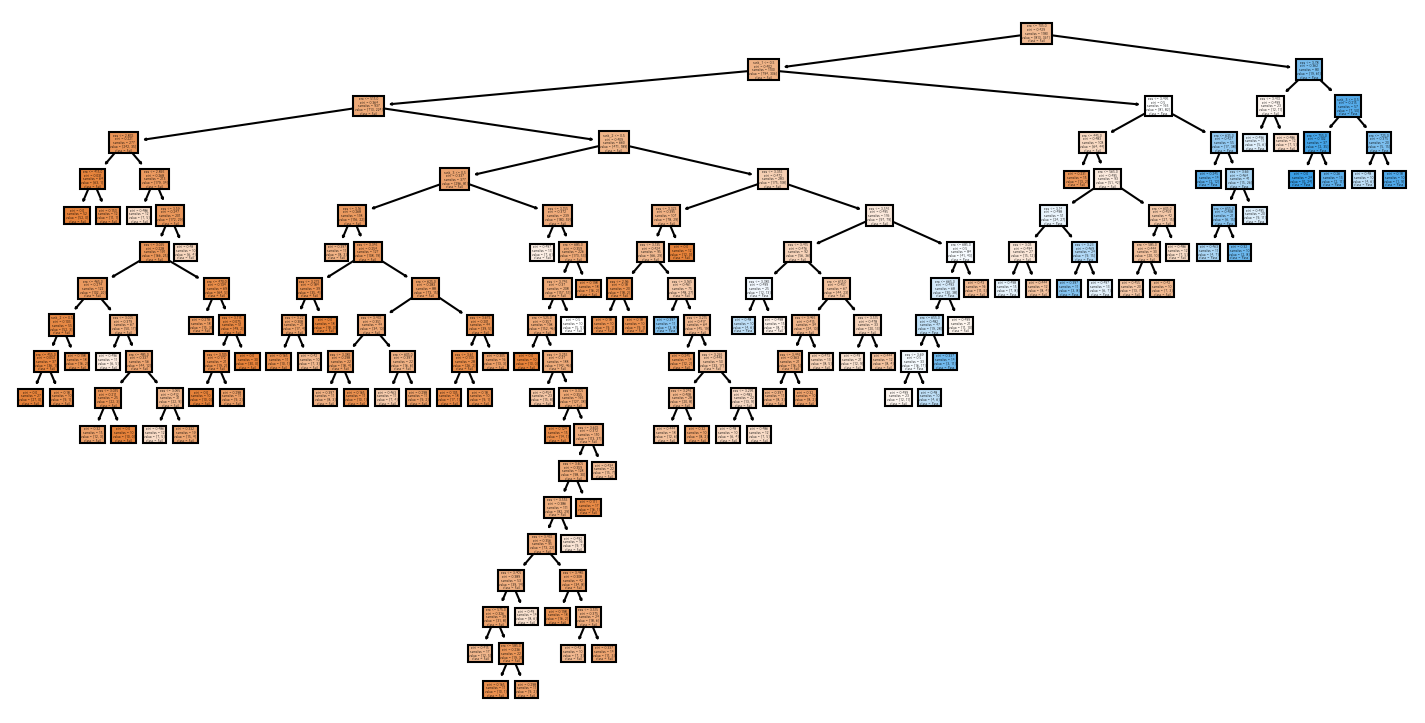

In [22]:
# 현재 셀에 적용할 그래프 크기(인치)와 해상도를 설정합니다.
plt.figure(figsize = (12, 6), dpi = 150)

# 가지치기 전 분류모형을 시각화합니다.
plot_tree(decision_tree = model, 
          feature_names = list(X_train.columns), 
          class_names = list(model.classes_),
          filled = True);

### 이미지 저장 폴더 생성

In [23]:
# 현재 작업 경로를 확인합니다.
os.getcwd()

'/Users/hdsceokevin/Documents/Lectures/Python/MachineLearning/data'

In [24]:
# 현재 작업 경로와 형제 관계로 폴더명을 생성합니다.
folder_path = '../image'

In [25]:
# 현재 작업 경로와 형제 관계인 image 폴더가 없으면 새로 만듭니다.
if not os.path.exists(path = folder_path):
    os.mkdir(path = folder_path)

### 가지치기 전 분류모형 시각화

In [26]:
# image 폴더로 작업 경로를 변경합니다.
os.chdir(path = folder_path)

In [27]:
# graphviz로 가지치기 전 분류모형을 png 파일로 저장합니다.
hds.ml.plot_tree(model = model, fileName = 'dtc1')

In [28]:
# 관련 라이브러리를 호출합니다.
from IPython.display import Image

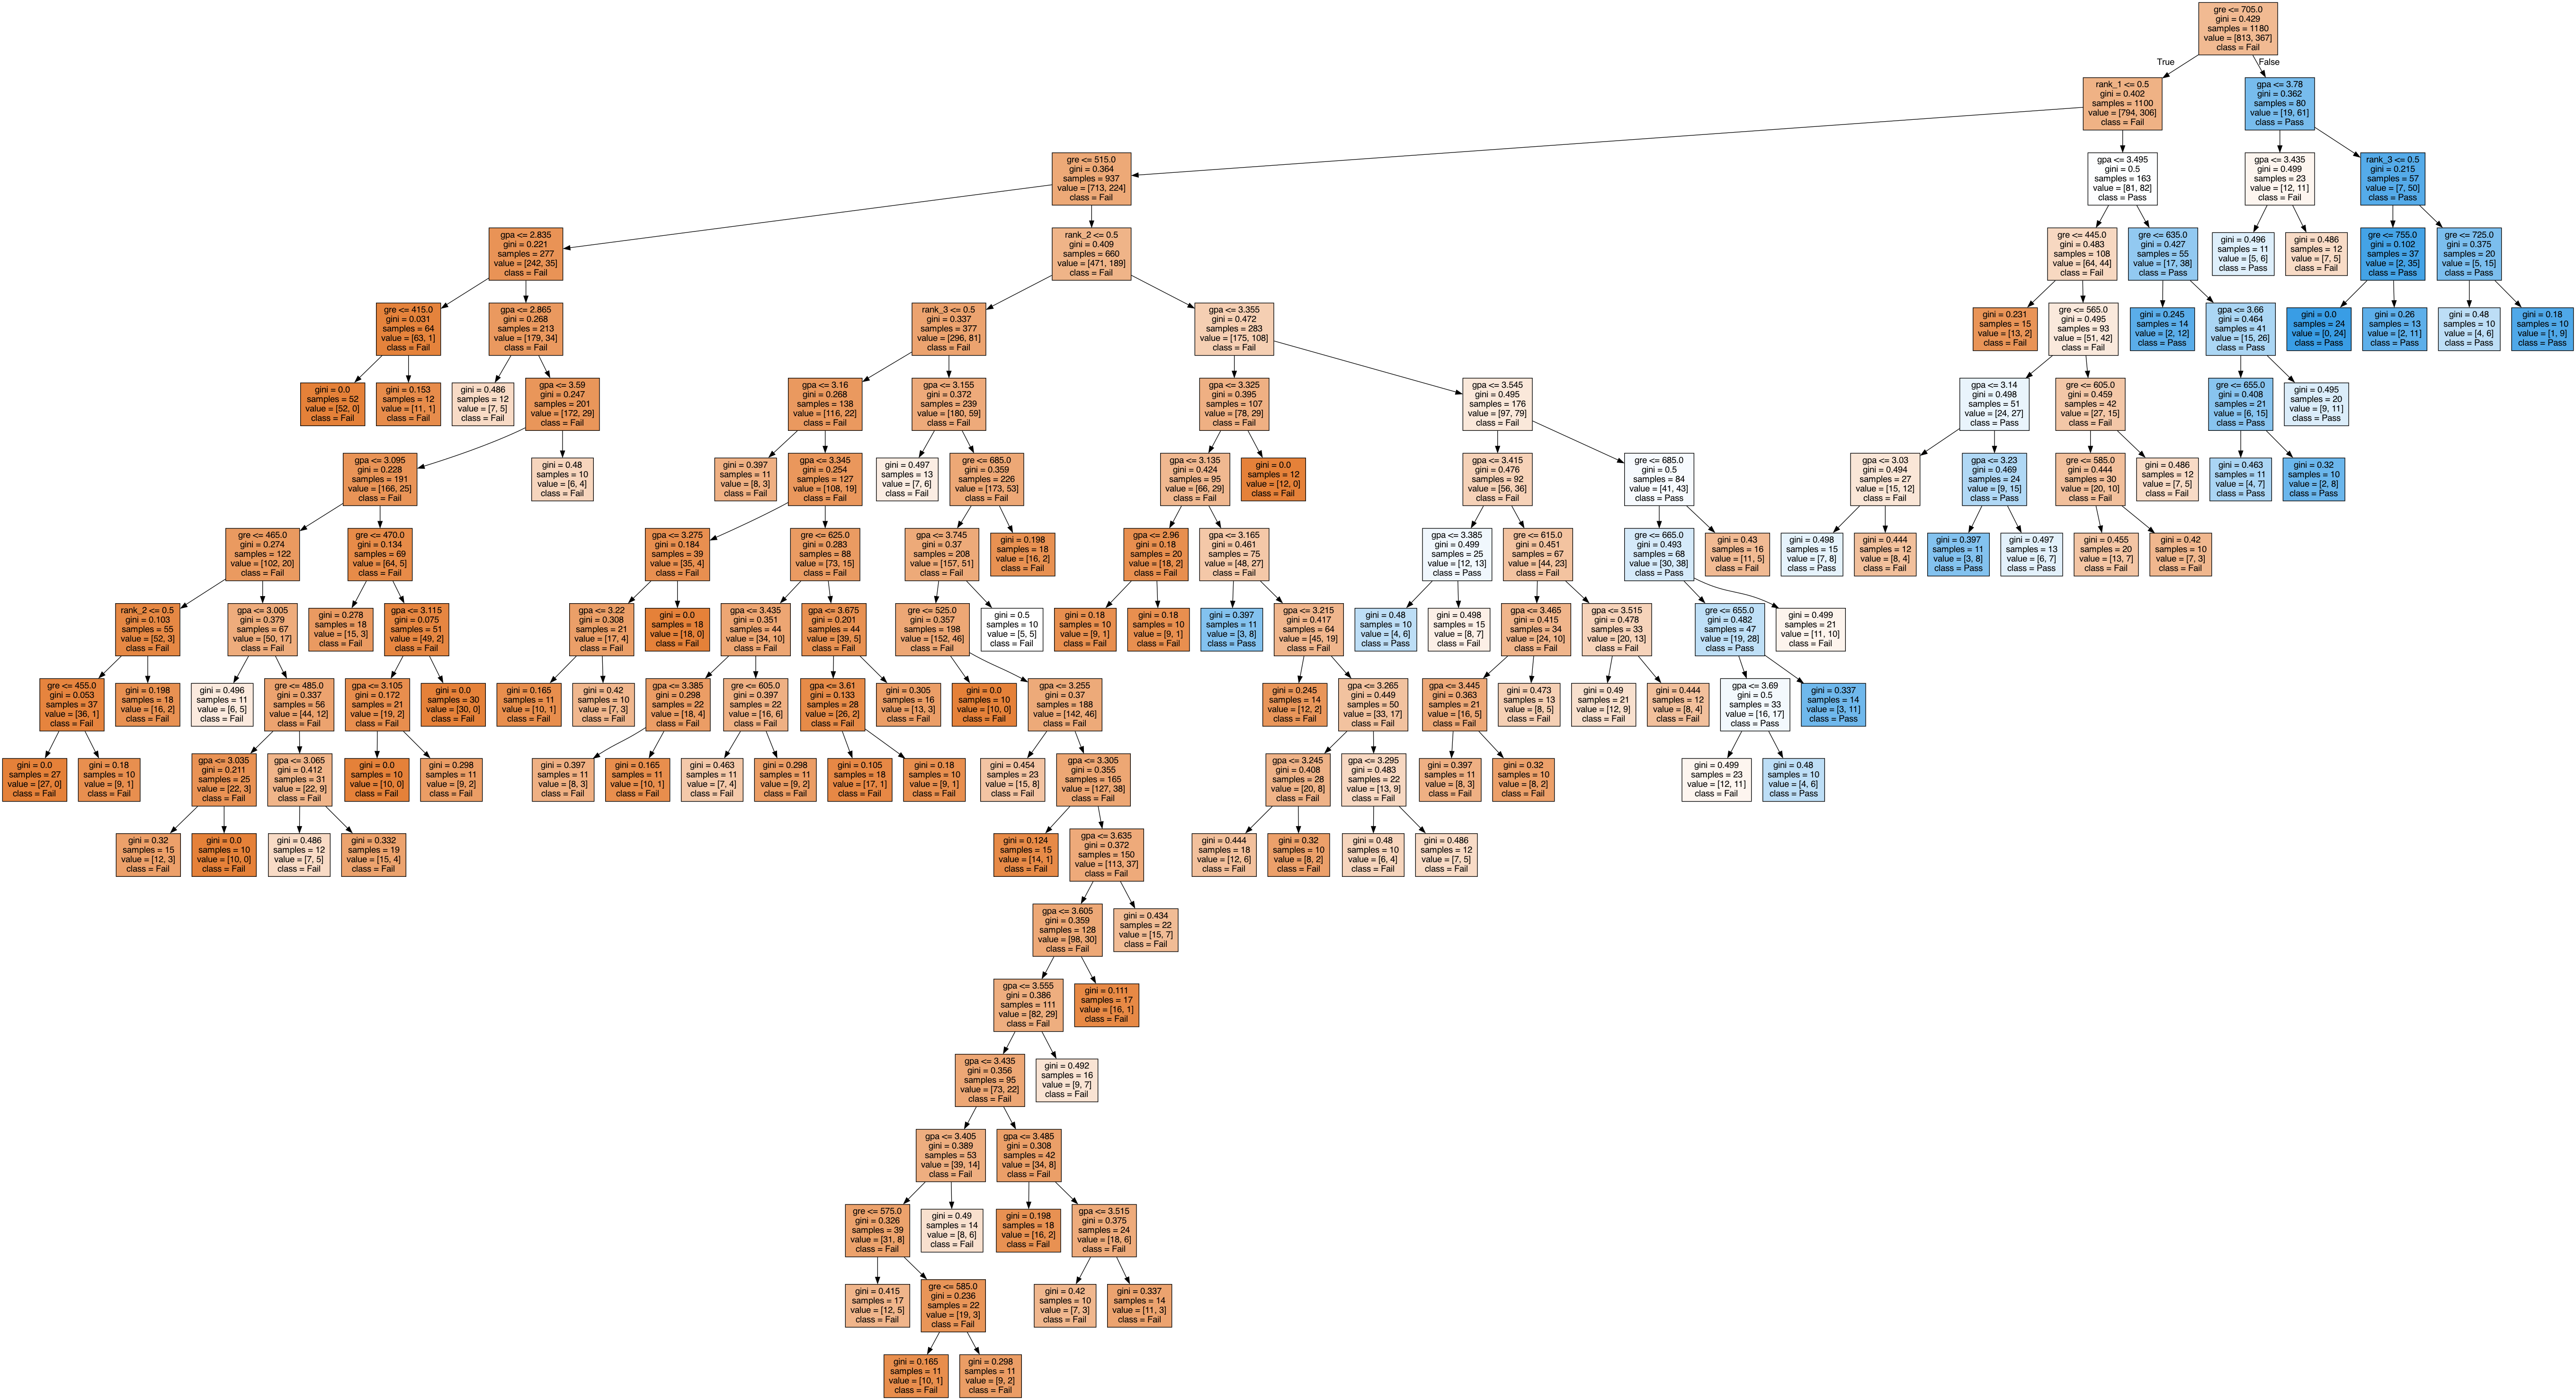

In [29]:
# png 파일을 Jupyter Notebook에 렌더링합니다.
Image(data = 'dtc1.png')

### 나무모형의 크기 확인

In [30]:
# 가지치기 전 분류모형의 깊이를 확인합니다.
model.get_depth()

18

In [31]:
# 가지치기 전 분류모형의 끝마디 개수를 확인합니다.
model.get_n_leaves()

82

### 가지치기 전 분류모형 특성 중요도

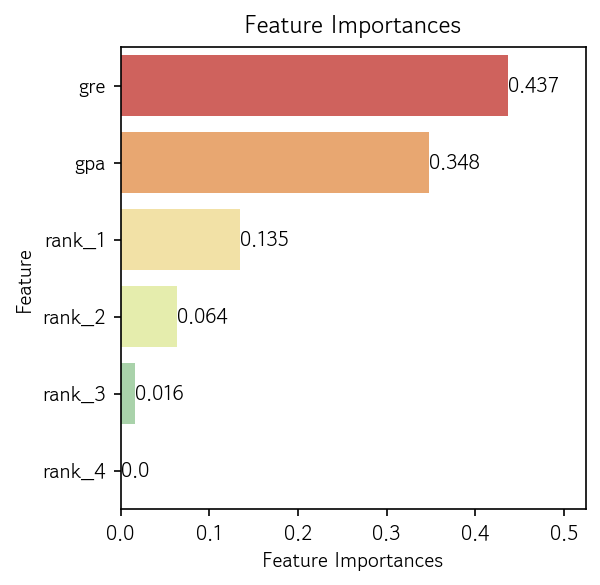

In [32]:
# 가지치기 전 분류모형 특성 중요도로 막대 그래프를 그립니다.
hds.ml.plot_feature_importance(model = model, pal = 'Spectral')

### 분류모형 성능 평가

In [33]:
# 가지치기 전 분류모형의 검증셋 추정확률을 생성합니다.
y_vprob1 = model.predict_proba(X = X_valid)

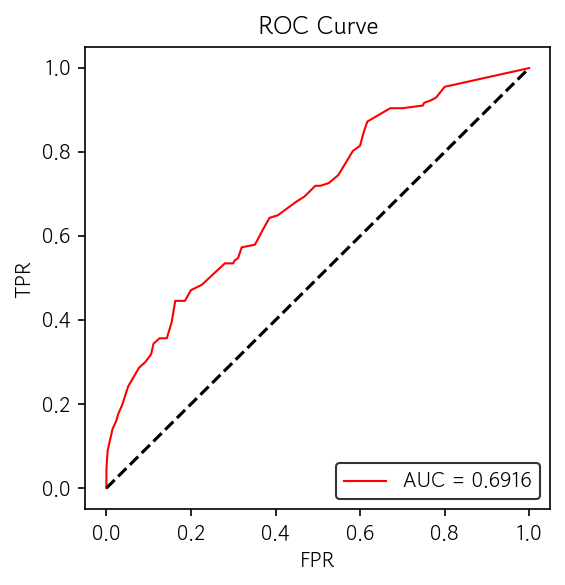

In [34]:
# 가지치기 전 분류모형의 ROC 곡선을 그립니다.
hds.stat.roc_curve(y_true = y_valid, y_prob = y_vprob1, color = 'red')

In [35]:
# 가지치기 전 분류모형의 검증셋 추정값을 생성합니다.
y_vpred1 = model.predict(X = X_valid)

In [36]:
# 가지치기 전 분류모형의 혼동행렬 리포트를 출력합니다.
hds.stat.clfmetrics(y_true = y_valid, y_pred = y_vpred1)

▶ Confusion Matrix


Real,Fail,Pass,All
Pred,,,
Fail,306,101,407
Pass,44,56,100
All,350,157,507



▶ Classification Report
              precision    recall  f1-score   support

        Fail     0.7518    0.8743    0.8085       350
        Pass     0.5600    0.3567    0.4358       157

    accuracy                         0.7140       507
   macro avg     0.6559    0.6155    0.6221       507
weighted avg     0.6924    0.7140    0.6931       507



### 나무모형 가지치기 경로 확인

In [37]:
# 나무모형의 가지치기 단계별 비용 복잡도 파라미터와 총불순도를 생성합니다.
path = model.cost_complexity_pruning_path(X = X_train, y = y_train)

In [38]:
# path를 데이터프레임으로 변환합니다.
path = pd.DataFrame(data = path)

In [39]:
# path를 출력합니다.
path

,ccp_alphas,impurities
0,0.000000,0.307100
1,0.000000,0.307100
2,0.000003,0.307102
3,0.000022,0.307124
4,0.000028,0.307152
...,...,...
56,0.004964,0.366432
57,0.007620,0.374052
58,0.008467,0.382519
59,0.016403,0.398922


In [40]:
# path의 열이름을 변경합니다.
path.columns = ['alpha', 'impurity']

### 나무모형 가지치기 경로 시각화

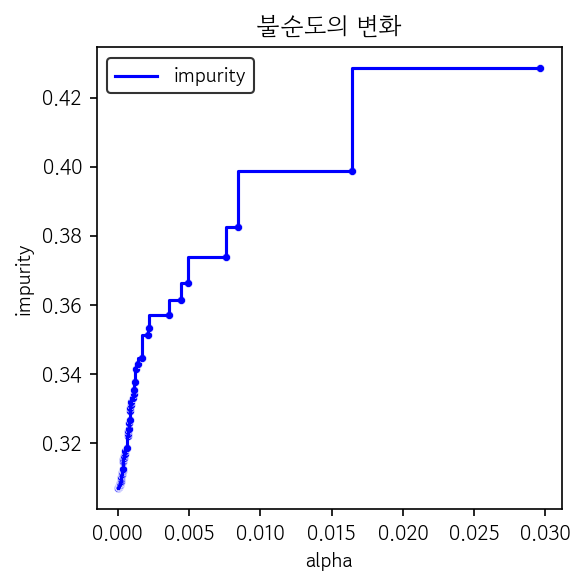

In [41]:
# alpha와 총불순도로 단계 그래프를 그립니다.
hds.ml.plot_step(data = path, x = 'alpha', y = 'impurity')
plt.title(label = '불순도의 변화');

### 최적의 나무모형 탐색

In [42]:
# 관련 라이브러리를 호출합니다.
from sklearn.base import clone

In [43]:
# 복제 모형을 저장할 빈 리스트를 생성합니다.
trees = []

In [44]:
# 반복문으로 alpha를 바꿔가면서 복제 모형을 리스트에 추가합니다.
for alpha in path['alpha']:
    tree = clone(estimator = model)
    tree.set_params(ccp_alpha = alpha)
    tree.fit(X = X_train, y = y_train)
    trees.append(tree)

In [45]:
# 복제 모형의 깊이, 끝마디 개수, 훈련셋과 검증셋 정확도를 path에 추가합니다.
path['depth'] = [t.get_depth() for t in trees]
path['leaves'] = [t.get_n_leaves() for t in trees]
path['train_scores'] = [t.score(X = X_train, y = y_train) for t in trees]
path['valid_scores'] = [t.score(X = X_valid, y = y_valid) for t in trees]

In [46]:
# path의 처음 10행을 출력합니다.
path.head(n = 10)

,alpha,impurity,depth,leaves,train_scores,valid_scores
0,0.000000,0.307100,18,82,0.764407,0.714004
1,0.000000,0.307100,18,82,0.764407,0.714004
2,0.000003,0.307102,18,80,0.764407,0.714004
3,0.000022,0.307124,18,79,0.764407,0.714004
4,0.000028,0.307152,18,78,0.764407,0.714004
5,0.000047,0.307199,18,77,0.764407,0.714004
6,0.000073,0.307271,18,76,0.764407,0.714004
7,0.000077,0.307349,17,75,0.764407,0.714004
8,0.000101,0.307449,17,74,0.764407,0.714004
9,0.000115,0.307564,17,73,0.764407,0.714004


### 최적의 나무모형 탐색 결과 시각화

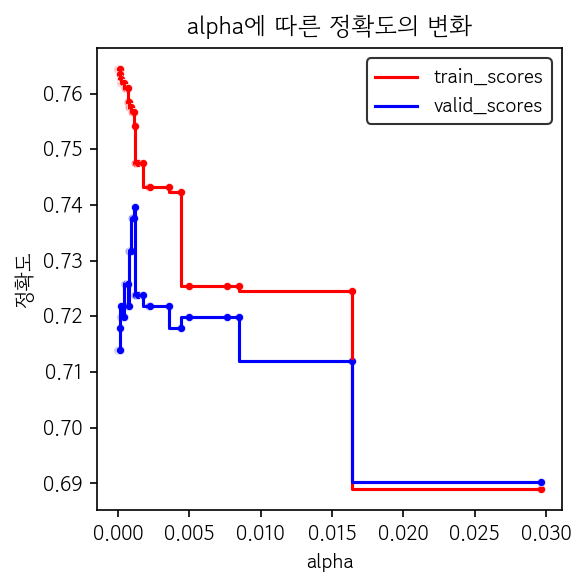

In [47]:
# 훈련셋과 검증셋 정확도로 단계 그래프를 그립니다.
hds.ml.plot_step(data = path, x = 'alpha', y = 'train_scores', color = 'red')
hds.ml.plot_step(data = path, x = 'alpha', y = 'valid_scores', color = 'blue')
plt.title(label = 'alpha에 따른 정확도의 변화')
plt.ylabel(ylabel = '정확도');

### 최적의 파라미터 탐색

In [48]:
# 검증셋 정확도가 최댓값인 인덱스를 locs에 할당합니다.
locs = np.where(path['valid_scores'].eq(path['valid_scores'].max()))

In [49]:
# locs의 첫 번째 원소를 출력합니다.
locs[0]

array([47])

In [50]:
# 검증셋 정확도가 최댓값일 때의 alpha를 best_alpha에 할당합니다.
best_alpha = path['alpha'][locs[0][-1]]
best_alpha

0.0011585060486742418

### 가지치기 후 분류모형 적합

In [51]:
# 기존 모형에 best_alpha를 설정합니다.
model.set_params(ccp_alpha = best_alpha)

DecisionTreeClassifier(ccp_alpha=0.0011585060486742418, min_samples_leaf=10,
                       min_samples_split=20, random_state=0)

In [52]:
# 훈련셋으로 가지치기 후 분류모형을 적합합니다.
model.fit(X = X_train, y = y_train)

DecisionTreeClassifier(ccp_alpha=0.0011585060486742418, min_samples_leaf=10,
                       min_samples_split=20, random_state=0)

In [53]:
# 가지치기 후 분류모형의 훈련셋 정확도를 확인합니다.
model.score(X = X_train, y = y_train)

0.7542372881355932

In [54]:
# 가지치기 후 분류모형의 검증셋 정확도를 확인합니다.
model.score(X = X_valid, y = y_valid)

0.7396449704142012

### 가지치기 후 분류모형 시각화

In [55]:
# graphviz로 가지치기 전 분류모형을 png 파일로 저장합니다.
hds.ml.plot_tree(model = model, fileName = 'dtc2')

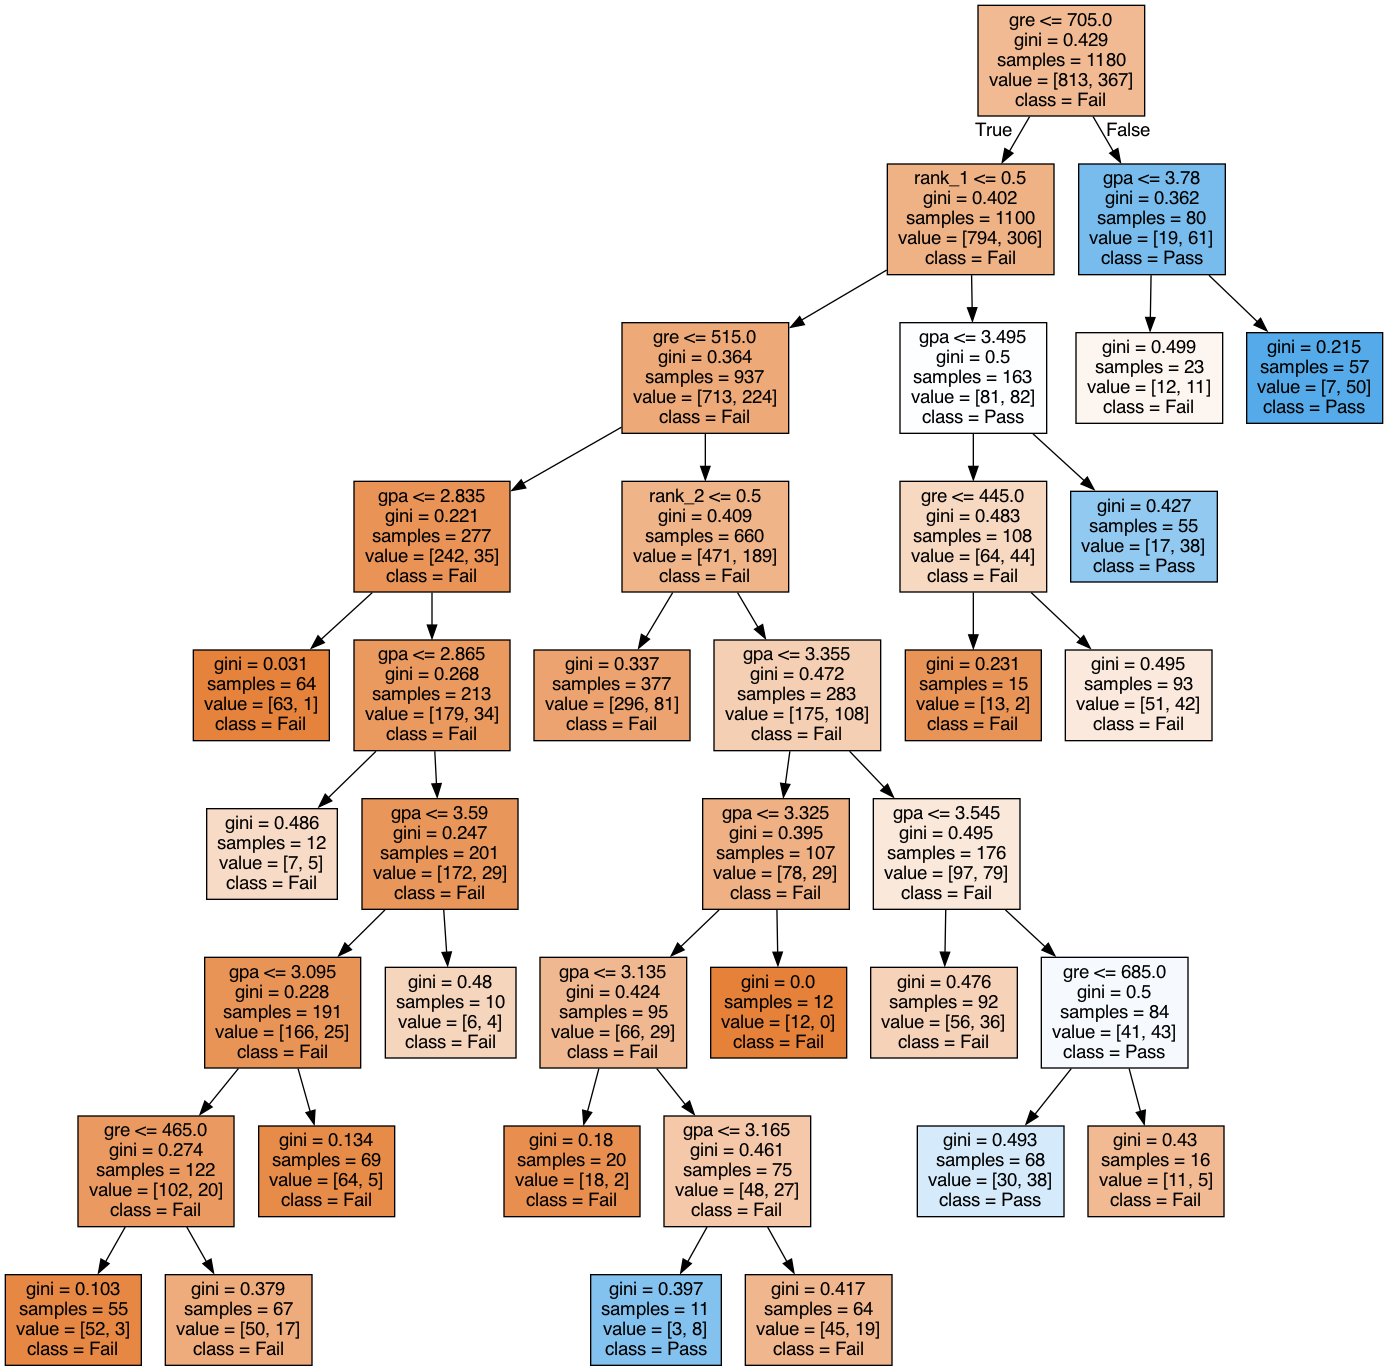

In [56]:
# png 파일을 Jupyter Notebook에 렌더링합니다.
Image(data = 'dtc2.png')

### 가지치기 후 분류모형 특성 중요도

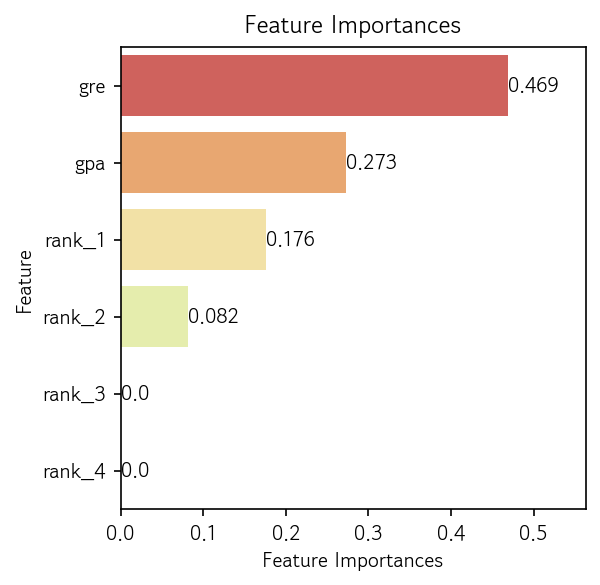

In [57]:
# 가지치기 후 분류모형 특성 중요도로 막대 그래프를 그립니다.
hds.ml.plot_feature_importance(model = model, pal = 'Spectral')

### 분류모형 성능 평가

In [58]:
# 가지치기 후 분류모형의 검증셋 추정확률을 생성합니다.
y_vprob2 = model.predict_proba(X = X_valid)

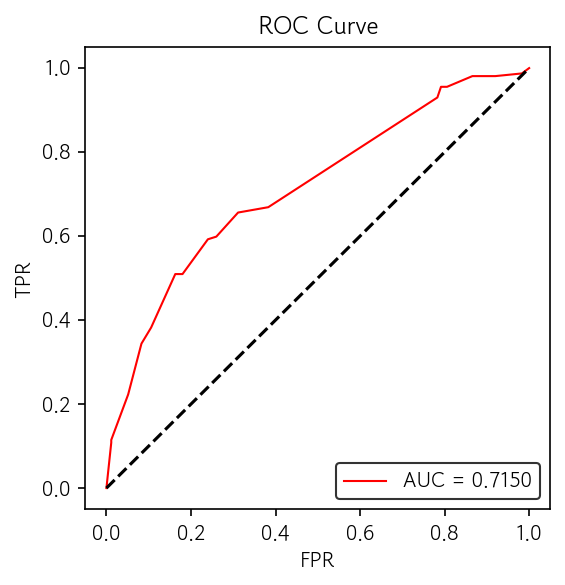

In [59]:
# 가지치기 후 분류모형의 ROC 곡선을 그립니다.
hds.stat.roc_curve(y_true = y_valid, y_prob = y_vprob2, color = 'red')

In [60]:
# 가지치기 후 분류모형의 검증셋 추정값을 생성합니다.
y_vpred2 = model.predict(X = X_valid)

In [61]:
# 가지치기 후 분류모형의 혼동행렬 리포트를 출력합니다.
hds.stat.clfmetrics(y_true = y_valid, y_pred = y_vpred2)

▶ Confusion Matrix


Real,Fail,Pass,All
Pred,,,
Fail,321,103,424
Pass,29,54,83
All,350,157,507



▶ Classification Report
              precision    recall  f1-score   support

        Fail     0.7571    0.9171    0.8295       350
        Pass     0.6506    0.3439    0.4500       157

    accuracy                         0.7396       507
   macro avg     0.7038    0.6305    0.6397       507
weighted avg     0.7241    0.7396    0.7120       507



## End of Document